# MNIST Handwritten Digit Classification

## Importing required libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

## Loading the dataset

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


## Calculating total training & testing examples along with size of each image

In [17]:
print("Total training examples are: ",len(X_train))
print("Total testing examples are: ",len(X_test))
print("Shape of each image is: ",X_train[0].shape)

Total training examples are:  60000
Total testing examples are:  10000
Shape of each image is:  (28, 28)


## Data visualization of some Training Images

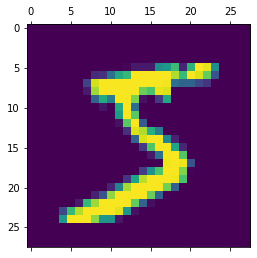

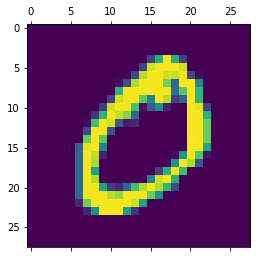

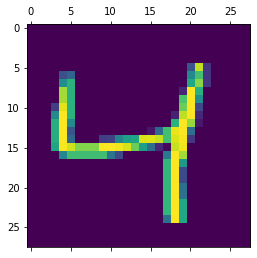

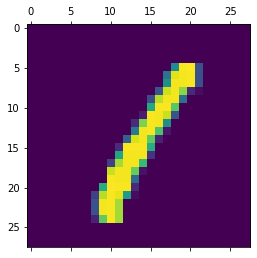

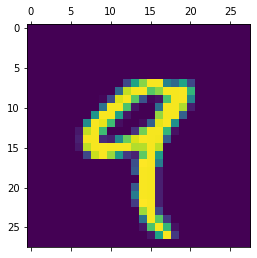

In [9]:
for i in range(0,5):
    plt.matshow(X_train[i])

## Actual values of above images 

In [11]:
print("Actual answers of above image is: ",y_train[:5])

Actual answers of above image is:  [5 0 4 1 9]


## Normalizing values of image

In [21]:
X_train = X_train/255
X_test = X_test/255

## Flattening the shape of image from (60000,28,28) to (60000,784)

In [22]:
X_train_flat = X_train.reshape(len(X_train),28*28)
print("Now the dimensions of training images are: ",X_train_flat.shape)

X_test_flat = X_test.reshape(len(X_test),28*28)
print("Now the dimensions of test images are: ",X_test_flat.shape)

Now the dimensions of training images are:  (60000, 784)
Now the dimensions of test images are:  (10000, 784)


## Simple neural network with no hidden layer. Input layer is directly connected to hidden layer

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4871 - accuracy: 0.8796
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3062 - accuracy: 0.9158
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2851 - accuracy: 0.9212
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2747 - accuracy: 0.9243
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2682 - accuracy: 0.9258


## Calculation of loss and accuracy on testing data

In [27]:
loss,accuracy = model.evaluate(X_test_flat,y_test)
print("Loss on test dataset is: ",loss)
print("Accuracy on test dataset is: ",accuracy)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2656 - accuracy: 0.9265
Loss on test dataset is:  0.2655695793867111
Accuracy on test dataset is:  0.9265


## Calculating the predictions

In [36]:
y_predicted = model.predict(X_test_flat)
y_predicted

array([[1.6675735e-05, 9.9445611e-11, 3.7794845e-05, ..., 7.8227043e-01,
        6.8956455e-05, 1.2183134e-03],
       [2.8644386e-04, 1.1531911e-06, 5.1218987e-01, ..., 3.4745726e-16,
        8.1946127e-05, 3.9978416e-13],
       [1.5204068e-06, 4.1817325e-01, 7.6970309e-03, ..., 6.9501280e-04,
        2.9339055e-03, 2.8087030e-04],
       ...,
       [2.4077365e-11, 3.2361034e-11, 1.2413762e-08, ..., 4.6241998e-06,
        1.9754218e-05, 1.0450929e-04],
       [1.0818269e-08, 2.8298073e-08, 1.9523593e-08, ..., 6.9463368e-09,
        3.4430966e-04, 2.7811726e-08],
       [6.4874584e-08, 2.0236189e-15, 1.1802747e-06, ..., 1.2547512e-13,
        2.7125617e-09, 1.4626481e-12]], dtype=float32)

## Predicted values are converted to actual output labels

In [37]:
#In above block y_predicted values are floating values so we need to convert them
y_fin_output = [np.argmax(i) for i in y_predicted]

## Visualization of testing images 

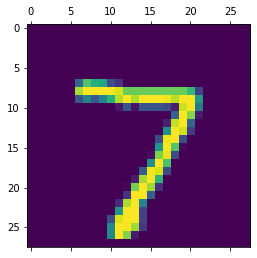

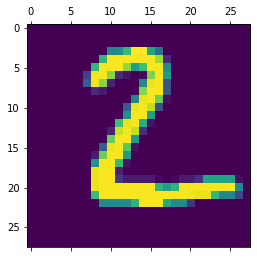

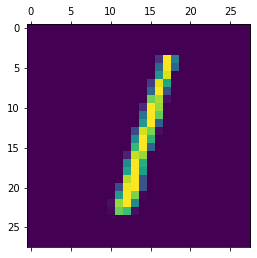

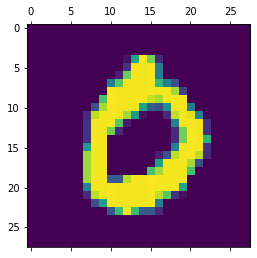

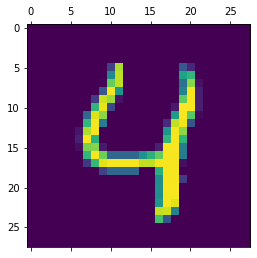

In [33]:
#Visualization of first 5 testing images
for i in range(0,5):
    plt.matshow(X_test[i])

## Our predictions on above images

In [35]:
#Predicted results on testing data
for i in range(0,5):
    print("Predicted results on first 5 testing images are: ",np.argmax(y_predicted[i]))

Predicted results on first 5 testing images are:  7
Predicted results on first 5 testing images are:  2
Predicted results on first 5 testing images are:  1
Predicted results on first 5 testing images are:  0
Predicted results on first 5 testing images are:  4


## Plotting the confusion matrix

Text(87.0, 0.5, 'Actual values')

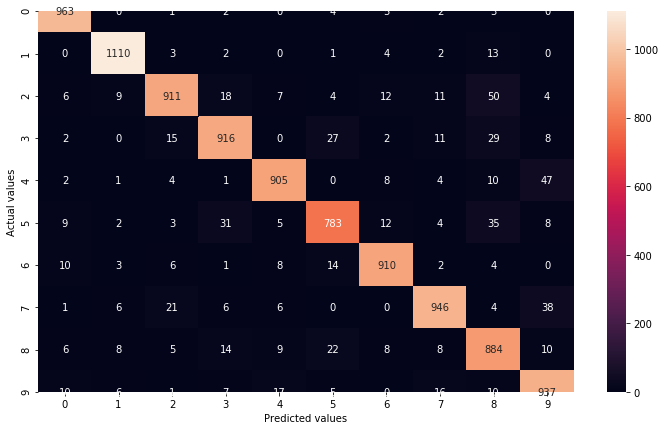

In [42]:
#Plotting the confusion matrix
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_fin_output)
plt.figure(figsize=(12,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

## Building new model with hidden layers in neural network

In [51]:
#Training new model by adding hidden layers
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2749 - accuracy: 0.9223
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1172 - accuracy: 0.9647
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0837 - accuracy: 0.9749
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0644 - accuracy: 0.9804
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0511 - accuracy: 0.9843
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0420 - accuracy: 0.9869
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0354 - accuracy: 0.9886
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0310 - accuracy: 0.9897
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0258 - accuracy: 0.9914
Epoch 10/10
60

## Calculation of loss and accuracy on testing data

In [52]:
loss,accuracy = model.evaluate(X_test_flat,y_test)
print("Loss on test dataset is: ",loss)
print("Accuracy on test dataset is: ",accuracy)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.1020 - accuracy: 0.9755
Loss on test dataset is:  0.1020047521321394
Accuracy on test dataset is:  0.9755


## Plotting the confusion matrix

Text(87.0, 0.5, 'Actual values')

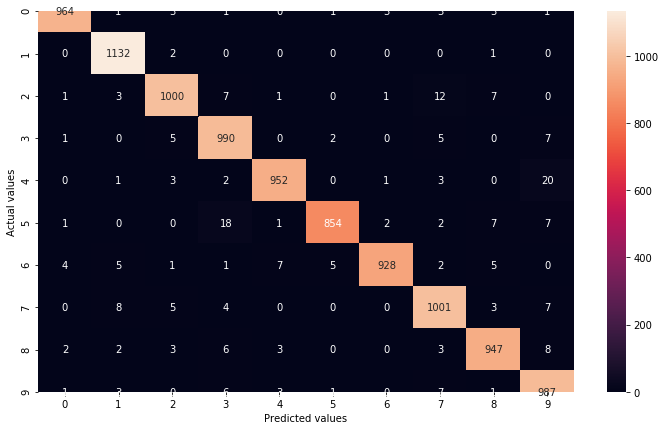

In [53]:
y_predicted = model.predict(X_test_flat)
y_fin_output = [np.argmax(i) for i in y_predicted]


cm = tf.math.confusion_matrix(labels = y_test,predictions = y_fin_output)
plt.figure(figsize=(12,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")